<a href="https://colab.research.google.com/github/sathvika-vegiraju/sathvika-vegiraju_MachineLearning/blob/main/AML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

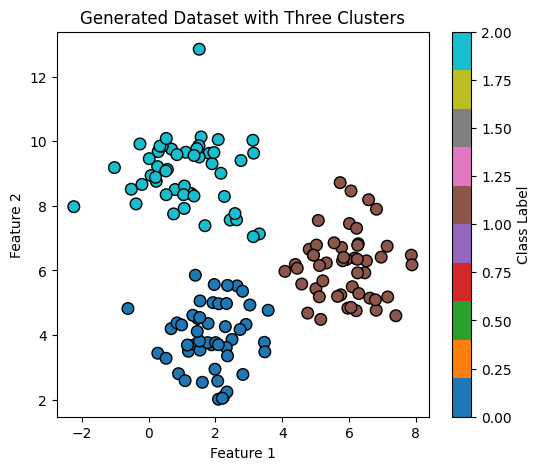

K=2 → Train Accuracy: 1.00, Test Accuracy: 1.00
K=4 → Train Accuracy: 1.00, Test Accuracy: 1.00
K=6 → Train Accuracy: 1.00, Test Accuracy: 1.00
K=8 → Train Accuracy: 1.00, Test Accuracy: 1.00

Best K chosen: 2 with Test Accuracy = 1.00


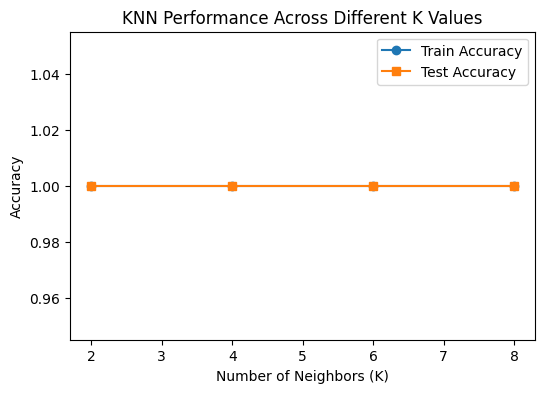

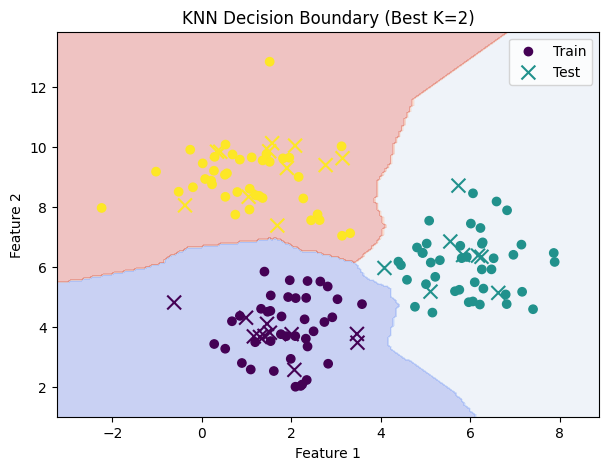

In [3]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 1: Generate synthetic dataset (3 clusters)
centers = [[2, 4], [6, 6], [1, 9]]
X, y = make_blobs(n_samples=150, centers=centers, random_state=42)

# 🔹 Extra Plot: Show raw dataset with true labels
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='tab10', edgecolor='black', s=70)
plt.title("Generated Dataset with Three Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Class Label")
plt.show()

# Step 2: Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Try different values of K
neighbors_list = [2, 4, 6, 8]
train_scores, test_scores = [], []
models = {}

for k in neighbors_list:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    # Accuracy scores
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))

    train_scores.append(train_acc)
    test_scores.append(test_acc)
    models[k] = model

    print(f"K={k} → Train Accuracy: {train_acc:.2f}, Test Accuracy: {test_acc:.2f}")

# Step 4: Pick the best k based on test accuracy
best_k = neighbors_list[np.argmax(test_scores)]
best_model = models[best_k]
print(f"\nBest K chosen: {best_k} with Test Accuracy = {max(test_scores):.2f}")

# Step 5a: Plot accuracy vs K
plt.figure(figsize=(6, 4))
plt.plot(neighbors_list, train_scores, marker='o', label="Train Accuracy")
plt.plot(neighbors_list, test_scores, marker='s', label="Test Accuracy")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("KNN Performance Across Different K Values")
plt.legend()
plt.show()

# Step 5b: Plot decision boundary for best K
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7, 5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', label="Train")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', s=100, label="Test")
plt.title(f"KNN Decision Boundary (Best K={best_k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
